# Sign detection using machine learning 

## Resources:
1. Python
2. TensorFlow/Keras
3. OpenCv
4. ANN
5. CNN

# What is neural network ? 

1. it is the kind of the black box which takes multiple numbers as a input and make the sense between these output and input and finds pattern betweeen them. 
2. the Convulation neural network helps in the extraction of the important feature.
3. A neural network is, simply put, a series of algorithms that is extremely good at recognizing underlying relationships (correlations) in a set of data through a process that mimics the way the human brain operates.





## How does the neural network work ?? 
1. Artificial Neural Networks contain artificial neurons which are called units.
2. these units are arranged in the form of the layer which constitutes the whole artificial neural network in the system. 
3. commonly the artificial neural network will have one input layer, one middle layer and third output layer and it will have the hidden layer between them. 
4. the input layer accepts the data from the outside world, then the hidden layer will preprocess the data and output will provide the response in the form of the response data.
5. Each of these connections has weights that determine the influence of one unit on another unit. As the data transfers from one unit to another, the neural network learns more and more about the data which eventually results in an output from the output layer
 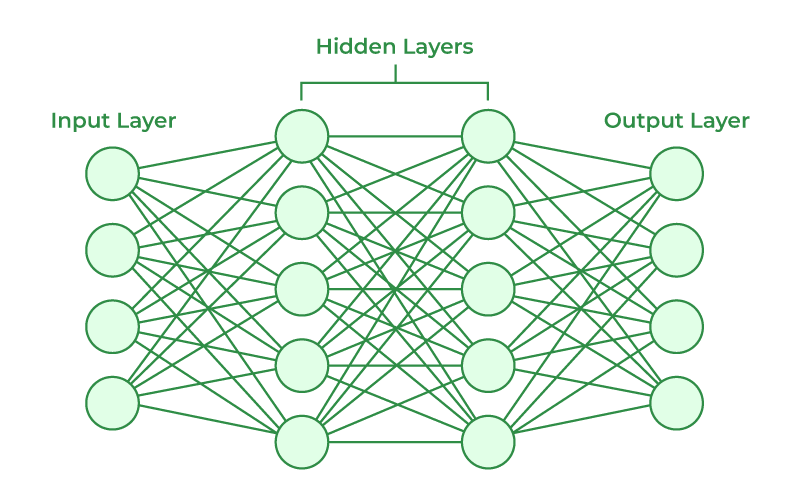
6. The input layer of an artificial neural network is the first layer, and it receives input from external sources and releases it to the hidden layer, which is the second layer. In the hidden layer, each neuron receives input from the previous layer neurons, computes the weighted sum, and sends it to the neurons in the next layer. These connections are weighted means effects of the inputs from the previous layer are optimized more or less by assigning different-different weights to each input and it is adjusted during the training process by optimizing these weights for improved model performance.




## Artificial neuron vs biological neuron
1. **the structure** of the artificial neuron is inspired by the biological neuron.
2. the joining of the nodes of the different layer is done with help of using weights.
3. **Learning**:learning happens in the cell body nucleus or soma, which has a nucleus that helps to process the impulses. An action potential is produced and travels through the axons if the impulses are powerful enough to reach the threshold. This becomes possible by synaptic plasticity, which represents the ability of synapses to become stronger or weaker over time in reaction to changes in their activity. In artificial neural networks, backpropagation is a technique used for learning, which adjusts the weights between nodes according to the error or differences between predicted and actual outcomes.
4. **Activation:**In biological neurons, activation is the firing rate of the neuron which happens when the impulses are strong enough to reach the threshold. In artificial neural networks, A mathematical function known as an activation function maps the input to the output, and executes activations.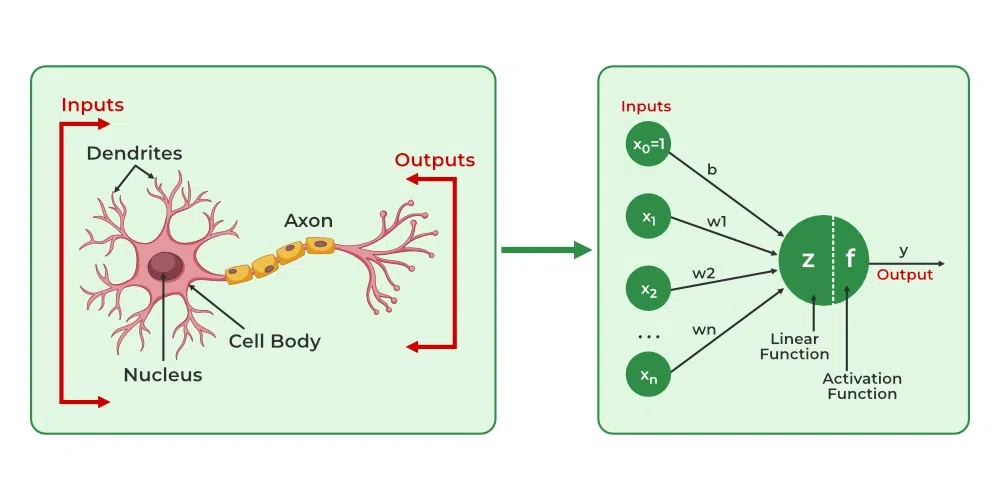




## How artificial neural network work ?? 
- these are trained using the training dataset.
- Once the neural network has been trained enough using images of cats, then you need to check if it can identify cat images correctly. This is done by making the ANN classify the images it is provided by deciding whether they are cat images or not. The output obtained by the ANN is corroborated by a human-provided description of whether the image is a cat image or not.
- If the ANN identifies incorrectly then back-propagation is used to adjust whatever it has learned during training. Backpropagation is done by fine-tuning the weights of the connections in ANN units based on the error rate obtained. This process continues until the artificial neural network can correctly recognize a cat in an image with minimal possible error rates.

## What are types of the artificial neural network ?? 
- **Forward Neural Network**: The feedforward neural network is one of the most basic artificial neural networks. In this ANN, the data or the input provided travels in a single direction. It enters into the ANN through the input layer and exits through the output layer while hidden layers may or may not exist. So the feedforward neural network has a front-propagated wave only and usually does not have backpropagation.
- **Convulation neural network**:A Convolutional neural network has some similarities to the feed-forward neural network, where the connections between units have weights that determine the influence of one unit on another unit. But a CNN has one or more than one convolutional layer that uses a convolution operation on the input and then passes the result obtained in the form of output to the next layer. CNN has applications in speech and image processing which is particularly useful in computer vision.
- **Recurrent neural network**: The Recurrent Neural Network saves the output of a layer and feeds this output back to the input to better predict the outcome of the layer. The first layer in the RNN is quite similar to the feed-forward neural network and the recurrent neural network starts once the output of the first layer is computed. After this layer, each unit will remember some information from the previous step so that it can act as a memory cell in performing computations. 






# Ann implementation

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense

print('All the libraries are present')


All the libraries are present


In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: xlabel='Outcome'>

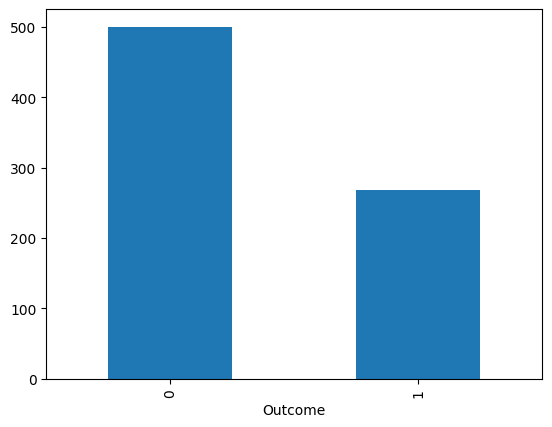

In [6]:
import seaborn as sns 
data['Outcome'].value_counts().plot(kind='bar')

# Preparing Data for modeling

In [7]:
# split data into input(x) and output(y) variables 

predictors = data.iloc[:,0:8] 
response = data.iloc[:,8]


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,response,test_size=0.2) 
print(X_train.shape,Y_train.shape) 
print(X_test.shape,Y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


## Training the neural network model 
## There are two ways to build the keras model: Sequential and functional. 
## The sequential API Allows you to create models layer-by-layer


In [14]:
kerasmodel = Sequential() # initialising the model - Dense for fully connected layer. 
kerasmodel.add(Dense(12,input_dim=8,activation='relu')) # First Hidden layer  -> dense means it is the fully connected neural network 
# first line says that give me first layer with 12 neurons and 8 dimensions means 8 independent columns in the data. and put relu as an activation function. 
kerasmodel.add(Dense(8,activation='relu')) # Relu to avoid the vanishing/exploring gradient problem 
kerasmodel.add(Dense(1,activation='sigmoid')) # since the output is binary to "sigmoid" - #output layer

# Please note weight and bias initialisation are done by keras default methods using "''glarot_uniform"

In [16]:
kerasmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 


In [18]:
kerasmodel.fit(X_train,Y_train,epochs=150,batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7704
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7590
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7410
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7638
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7638
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7671
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7622
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7573
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7524
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7606
Epoch 11/

In [22]:
# train accuracy
_,accuracy = kerasmodel.evaluate(X_train,Y_train)
print('Train Accuracy : % 2f %',(accuracy*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7980
Train Accuracy : % 2f % 79.80455756187439


In [28]:
# Test accuracy 
from sklearn.metrics import accuracy_score 
y_pred = model.predict_classes(X_test) 
accuracy_score(y_test,y_pred)

NameError: name 'model' is not defined

# Convolution neural network:
- is a class of deep neural networks which is mostly used to do image recognition, image classification, object detection, etc.- The advancements in Computer Vision with Deep Learning has been constructed and perfected with time, primarily over one particular algorithm — a Convolutional Neural Network.
- Image classification is the task of taking an input image and outputting a class or a probability of classes that best describes the image.
- In CNN, we take an image as an input, assign importance to its various aspects/features in the image and be able to differentiate one from another. The pre-processing required in CNN is much lesser as compared to other classification algorithms.
- 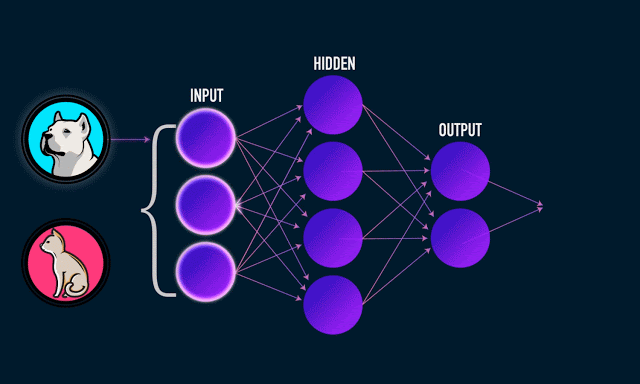
- A CNN typically has three layers: a convolutional layer, pooling layer, and fully connected layer:
- 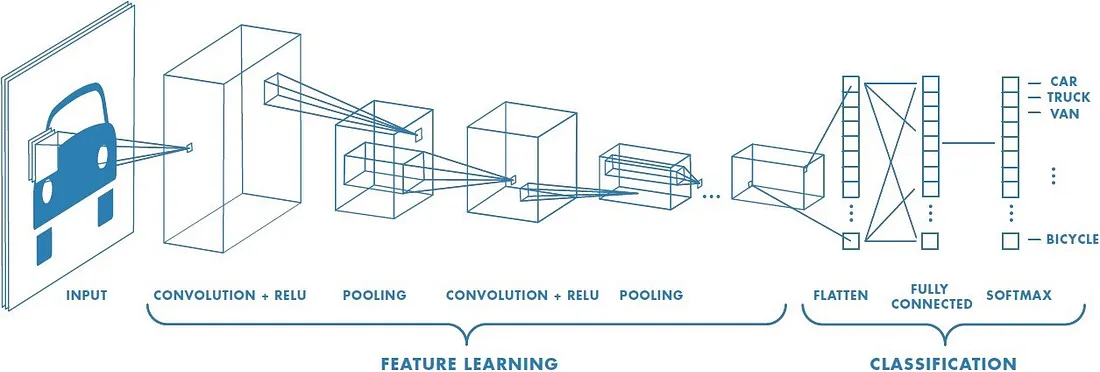
- The convolution layer is the core building block of CNN. It carries the main portion of the network’s computational load.
- The main objective of convolution is to extract features such as edges, colours, corners from the input. As we go deeper inside the network, the network starts identifying more complex features such as shapes,digits, face parts as well.
- Till now we haven’t done anything about classifying different images, what we have done is highlighted some features in an image and reduces the dimensions of the image drastically.
- From here on, we are actually going to do the classification process.

Now that we have converted our input image into a suitable form for our Multi-Level fully connected architecture, we shall flatten the image into one column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model can distinguish between dominating and certain low-level features in images and classify them

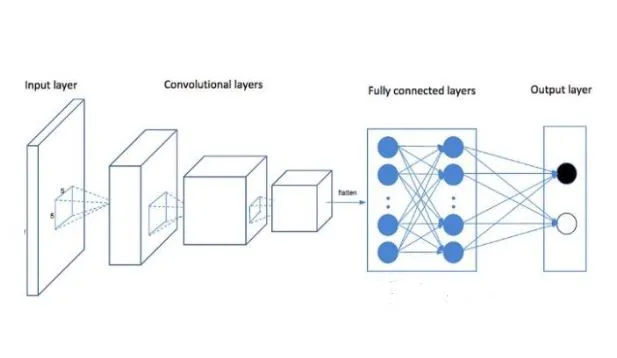.











